<a href="https://colab.research.google.com/github/earanibarp/matemaitcas-h07/blob/main/Introducci%C3%B3n_a_DS_H07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color=green>Introducción a DS</font>


---



In [27]:
!pip install numpy

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
notas = [10, 15, 20, 13]

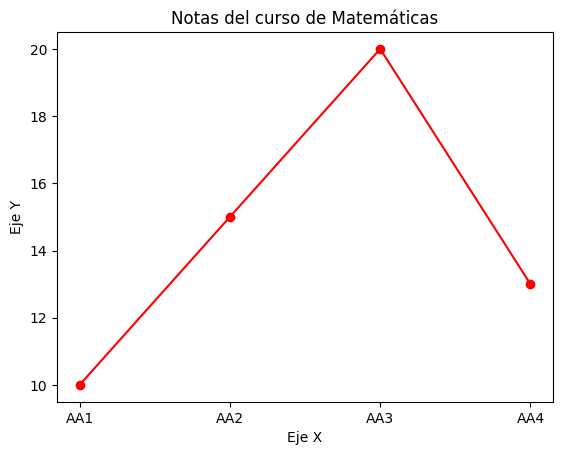

In [30]:
x = ["AA1", "AA2", "AA3", "AA4"]
y = notas

plt.plot(x, y, marker = "o", color = "r")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.title("Notas del curso de Matemáticas")
plt.show()

In [32]:
# @title Importando datos
datos = pd.read_csv("https://docs.google.com/spreadsheets/d/1LKY2GTuQJoFSBwt48J88sO36OpUycLE7rrNlz2ecN8c/export?format=csv")
datos

,Nombre,Apellido,Edad,Altura,Peso
0,Juan,Nuñez,18,"1,75",70
1,Luis,Alvarado,15,"1,70",74
2,Carlos,Valdez,24,"1,80",80
3,Juana,Flores,21,"1,68",65
4,Fiorela,Mendoza,17,"1,66",68
5,Rafael,Bustamante,28,"1,70",65
6,Oscar,Bellido,25,"1,73",70


In [33]:
# @title Ver el tipo de dato que contiene cada columna
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Nombre    7 non-null      object
 1   Apellido  7 non-null      object
 2   Edad      7 non-null      int64 
 3   Altura    7 non-null      object
 4   Peso      7 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 408.0+ bytes


In [34]:
# @title Ver estadística básica
datos.describe()

,Edad,Peso
count,7.000000,7.000000
mean,21.142857,70.285714
std,4.740906,5.313953
min,15.000000,65.000000
25%,17.500000,66.500000
50%,21.000000,70.000000
75%,24.500000,72.000000
max,28.000000,80.000000


In [35]:
# @title Ver cuántos valores nulos existen por columna
datos.isnull().sum()

Nombre      0
Apellido    0
Edad        0
Altura      0
Peso        0
dtype: int64

In [36]:
datos[["Nombre", "Edad", "Peso"]]

,Nombre,Edad,Peso
0,Juan,18,70
1,Luis,15,74
2,Carlos,24,80
3,Juana,21,65
4,Fiorela,17,68
5,Rafael,28,65
6,Oscar,25,70


In [37]:
# @title Convertir el tipo de dato de una columna
# datos.drop(["Altura"], axis=1)
datos["Altura"] = datos.Altura.str.replace(',', '.')
datos["Altura"] = datos["Altura"].astype(float)
datos

,Nombre,Apellido,Edad,Altura,Peso
0,Juan,Nuñez,18,1.75,70
1,Luis,Alvarado,15,1.70,74
2,Carlos,Valdez,24,1.80,80
3,Juana,Flores,21,1.68,65
4,Fiorela,Mendoza,17,1.66,68
5,Rafael,Bustamante,28,1.70,65
6,Oscar,Bellido,25,1.73,70


In [38]:
datos["Nombres y Apellidos"] = datos["Nombre"] + " " + datos["Apellido"]
datos["IMC"] = datos["Peso"] / (datos["Altura"] * datos["Altura"])
datos

,Nombre,Apellido,Edad,Altura,Peso,Nombres y Apellidos,IMC
0,Juan,Nuñez,18,1.75,70,Juan Nuñez,22.857143
1,Luis,Alvarado,15,1.70,74,Luis Alvarado,25.605536
2,Carlos,Valdez,24,1.80,80,Carlos Valdez,24.691358
3,Juana,Flores,21,1.68,65,Juana Flores,23.030045
4,Fiorela,Mendoza,17,1.66,68,Fiorela Mendoza,24.677021
5,Rafael,Bustamante,28,1.70,65,Rafael Bustamante,22.491349
6,Oscar,Bellido,25,1.73,70,Oscar Bellido,23.388687


In [39]:
# @title Eliminar filas / columnas
datos.drop(["Nombre", "Apellido"], axis=1, inplace=True) # axis = 1 -> columna / axis = 0 -> fila
datos.drop([0], axis=0, inplace=True)
datos

,Edad,Altura,Peso,Nombres y Apellidos,IMC
1,15,1.70,74,Luis Alvarado,25.605536
2,24,1.80,80,Carlos Valdez,24.691358
3,21,1.68,65,Juana Flores,23.030045
4,17,1.66,68,Fiorela Mendoza,24.677021
5,28,1.70,65,Rafael Bustamante,22.491349
6,25,1.73,70,Oscar Bellido,23.388687


In [40]:
datos = datos[["Nombres y Apellidos", "Edad", "Altura", "Peso", "IMC"]]
datos

,Nombres y Apellidos,Edad,Altura,Peso,IMC
1,Luis Alvarado,15,1.70,74,25.605536
2,Carlos Valdez,24,1.80,80,24.691358
3,Juana Flores,21,1.68,65,23.030045
4,Fiorela Mendoza,17,1.66,68,24.677021
5,Rafael Bustamante,28,1.70,65,22.491349
6,Oscar Bellido,25,1.73,70,23.388687


In [41]:
# @title Condiciones con DataFrame
#   datos[datos["Edad"]>21]
condicion = datos["Edad"]>21
datos[condicion]

,Nombres y Apellidos,Edad,Altura,Peso,IMC
2,Carlos Valdez,24,1.80,80,24.691358
5,Rafael Bustamante,28,1.70,65,22.491349
6,Oscar Bellido,25,1.73,70,23.388687


<Axes: ylabel='Nombres y Apellidos'>

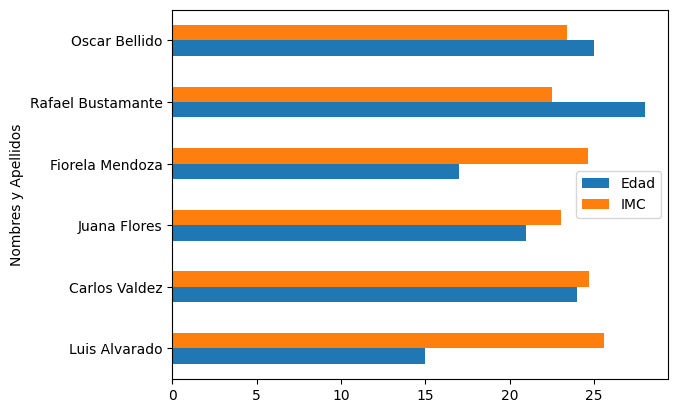

In [42]:
# Realizar un gráfico de barras, en el eje X: nombres y apellidos; en el eje Y: edad, IMC
datos.plot.barh(x= "Nombres y Apellidos",	y=["Edad", "IMC"])


In [87]:
datos_matricula = pd.read_excel("Sesión 11 - Datos Matrcula.xlsx", sheet_name="Hoja02")
#datos_matricula.head()  # primeros registros del DataFrame
#datos_matricula.tail() # primeros últimos del DataFrame
datos_matricula.sample(5) # registros aleatorios

,DEPARTAMENTO,Inicial-BR,Primaria-BR,Secundaria-BR,Basica-Alternativa,Basica-Especial,Tecnico-Productiva,Pedagog-Sup,Tecnolog-Sup,Artistica-Sup
7,Cusco,72859,151382,119634,10734,978,10495,5089,23586,349
14,Lima,520383,1028626,754391,69804,8925,96385,8137,238753,241
24,Ucayali,39101,94437,48666,5580,357,4183,711,4695,177
23,Tumbes,18258,30206,19624,3006,355,3354,537,2872,0
1,Ancash,62889,132539,97065,7438,780,7835,2642,9485,368


In [45]:
datos_matricula.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   DEPARTAMENTO        25 non-null     object
 1   Inicial-BR          25 non-null     int64 
 2   Primaria-BR         25 non-null     int64 
 3   Secundaria-BR       25 non-null     int64 
 4   Basica-Alternativa  25 non-null     int64 
 5   Basica-Especial     25 non-null     int64 
 6   Tecnico-Productiva  25 non-null     int64 
 7   Pedagog-Sup         25 non-null     int64 
 8   Tecnolog-Sup        25 non-null     int64 
 9   Artistica-Sup       25 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 2.1+ KB


In [46]:
# Obtener una lista con todas las columnas del DataFrame
datos_matricula.columns.values

array(['DEPARTAMENTO', 'Inicial-BR', 'Primaria-BR', 'Secundaria-BR',
       'Basica-Alternativa', 'Basica-Especial', 'Tecnico-Productiva',
       'Pedagog-Sup', 'Tecnolog-Sup', 'Artistica-Sup'], dtype=object)

In [47]:
# Obtener una lista con todos los índices del DataFrame
datos_matricula.index.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [49]:
# Ver el tamaño del DataFrame
datos_matricula.shape

(25, 10)

In [88]:
# Eliminar columnas que no necesitemos
datos_matricula.drop(["Tecnico-Productiva","Pedagog-Sup","Tecnolog-Sup", "Artistica-Sup"], axis = 1, inplace = True)
datos_matricula.head(5)

,DEPARTAMENTO,Inicial-BR,Primaria-BR,Secundaria-BR,Basica-Alternativa,Basica-Especial
0,Amazonas,29996,65115,40196,3320,201
1,Ancash,62889,132539,97065,7438,780
2,Apurímac,26845,50975,43543,3075,447
3,Arequipa,77662,150544,110955,6326,1092
4,Ayacucho,36981,78667,64624,6036,290


In [89]:
# Renombrar columnas

datos_matricula.rename(columns={"Inicial-BR": "Inicial Básica Regular",
                                "Primaria-BR": "Primaria Básica Regular",
                                "Secundaria-BR": "Secundaria Básica Regular",
                                "Basica-Alternativa": "Básica Alternativa",
                                "Basica-Especial": "Básica Especial"}, inplace = True)

In [90]:
datos_matricula.head(5)

,DEPARTAMENTO,Inicial Básica Regular,Primaria Básica Regular,Secundaria Básica Regular,Básica Alternativa,Básica Especial
0,Amazonas,29996,65115,40196,3320,201
1,Ancash,62889,132539,97065,7438,780
2,Apurímac,26845,50975,43543,3075,447
3,Arequipa,77662,150544,110955,6326,1092
4,Ayacucho,36981,78667,64624,6036,290


In [91]:
# Seleccionar columna(s)
datos_matricula[["DEPARTAMENTO", "Inicial Básica Regular"]]
# Seleccionar fila(s)
datos_matricula[0:4]

,DEPARTAMENTO,Inicial Básica Regular,Primaria Básica Regular,Secundaria Básica Regular,Básica Alternativa,Básica Especial
0,Amazonas,29996,65115,40196,3320,201
1,Ancash,62889,132539,97065,7438,780
2,Apurímac,26845,50975,43543,3075,447
3,Arequipa,77662,150544,110955,6326,1092


In [93]:
# .loc: para seleccionar un grupo de líneas y columnas según las etiquetas
datos_matricula.loc[[0,3], ["Inicial Básica Regular", "Primaria Básica Regular","Secundaria Básica Regular"]]

,Inicial Básica Regular,Primaria Básica Regular,Secundaria Básica Regular
0,29996,65115,40196
3,77662,150544,110955


In [95]:
datos_matricula.set_index("DEPARTAMENTO", inplace = True)
datos_matricula.head(5)

,Inicial Básica Regular,Primaria Básica Regular,Secundaria Básica Regular,Básica Alternativa,Básica Especial
DEPARTAMENTO,,,,,
Amazonas,29996,65115,40196,3320,201
Ancash,62889,132539,97065,7438,780
Apurímac,26845,50975,43543,3075,447
Arequipa,77662,150544,110955,6326,1092
Ayacucho,36981,78667,64624,6036,290


In [97]:
datos_matricula.loc[["Amazonas","Arequipa"], ["Inicial Básica Regular", "Primaria Básica Regular","Secundaria Básica Regular"]]

,Inicial Básica Regular,Primaria Básica Regular,Secundaria Básica Regular
DEPARTAMENTO,,,
Amazonas,29996,65115,40196
Arequipa,77662,150544,110955


In [104]:
# .iloc: para seleccionar teniendo en cuenta las posiciones lógicas
datos_matricula.iloc[[0, 3, 24], [0, 2]]

,Inicial Básica Regular,Secundaria Básica Regular
DEPARTAMENTO,,
Amazonas,29996,40196
Arequipa,77662,110955
Ucayali,39101,48666


In [106]:
select = datos_matricula["Inicial Básica Regular"] < 30000
datos_matricula[select]

,Inicial Básica Regular,Primaria Básica Regular,Secundaria Básica Regular,Básica Alternativa,Básica Especial
DEPARTAMENTO,,,,,
Amazonas,29996,65115,40196,3320,201
Apurímac,26845,50975,43543,3075,447
Huancavelica,22629,44510,40135,4282,234
Madre de Dios,11450,24866,14740,2036,58
Moquegua,10381,18436,14177,1528,204
Pasco,16923,34014,22518,2273,190
Tacna,18780,35799,27659,2150,217
Tumbes,18258,30206,19624,3006,355


In [107]:
datos_matricula[(datos_matricula["Inicial Básica Regular"] < 30000) & (datos_matricula["Primaria Básica Regular"]<20000)]

,Inicial Básica Regular,Primaria Básica Regular,Secundaria Básica Regular,Básica Alternativa,Básica Especial
DEPARTAMENTO,,,,,
Moquegua,10381,18436,14177,1528,204


<Axes: xlabel='DEPARTAMENTO'>

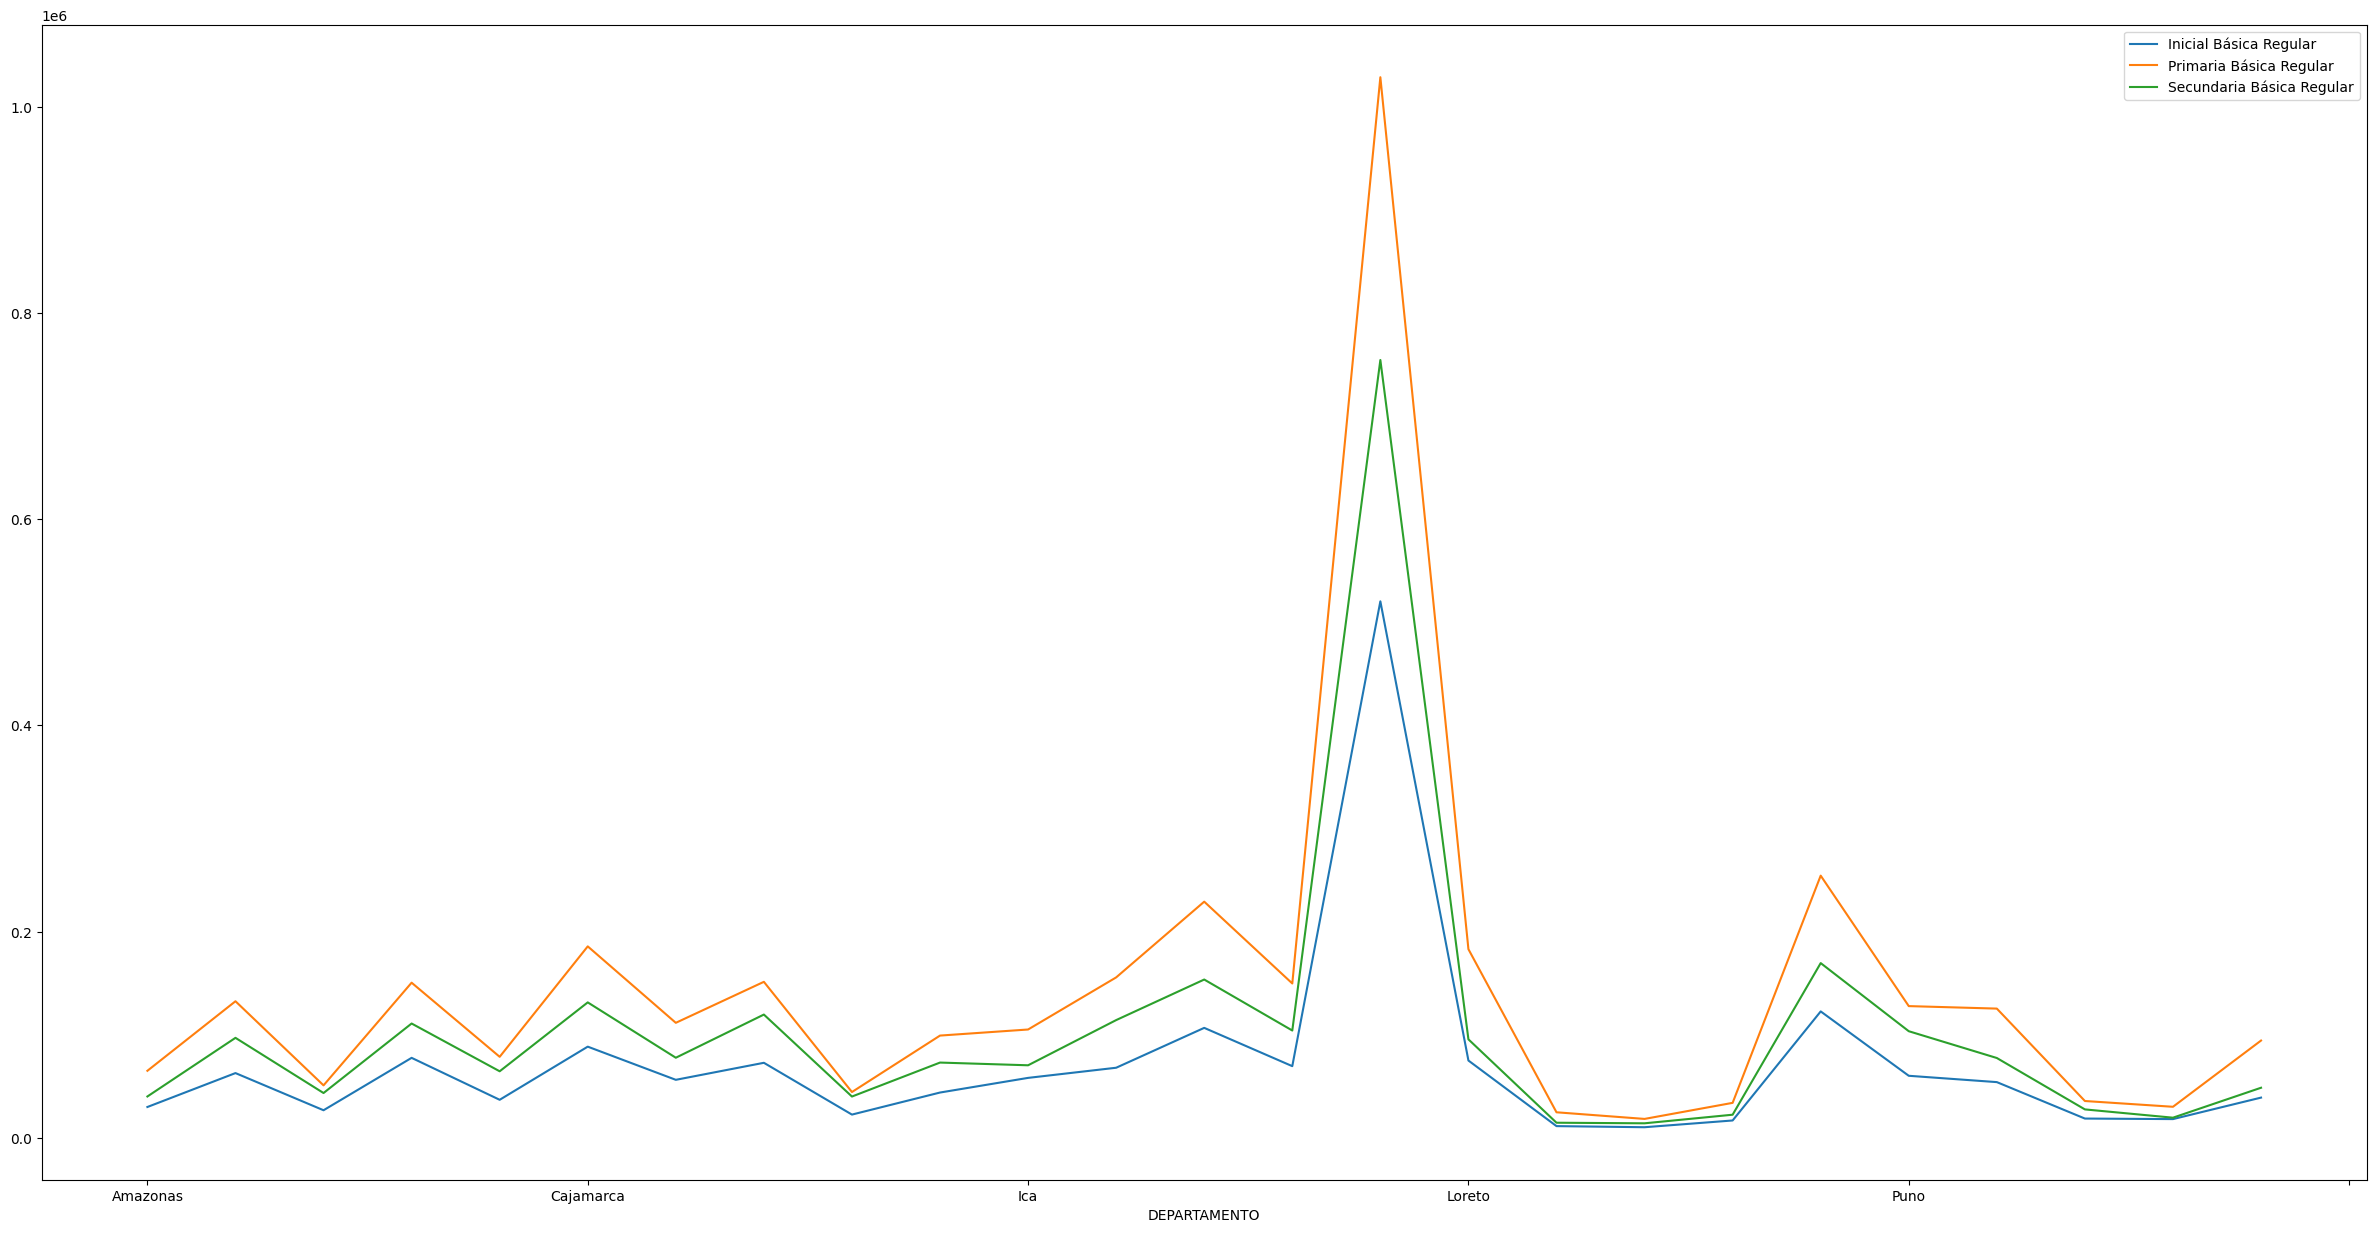

In [125]:
datos_matricula.plot(y = ["Inicial Básica Regular", "Primaria Básica Regular", "Secundaria Básica Regular"], figsize=(30,15))

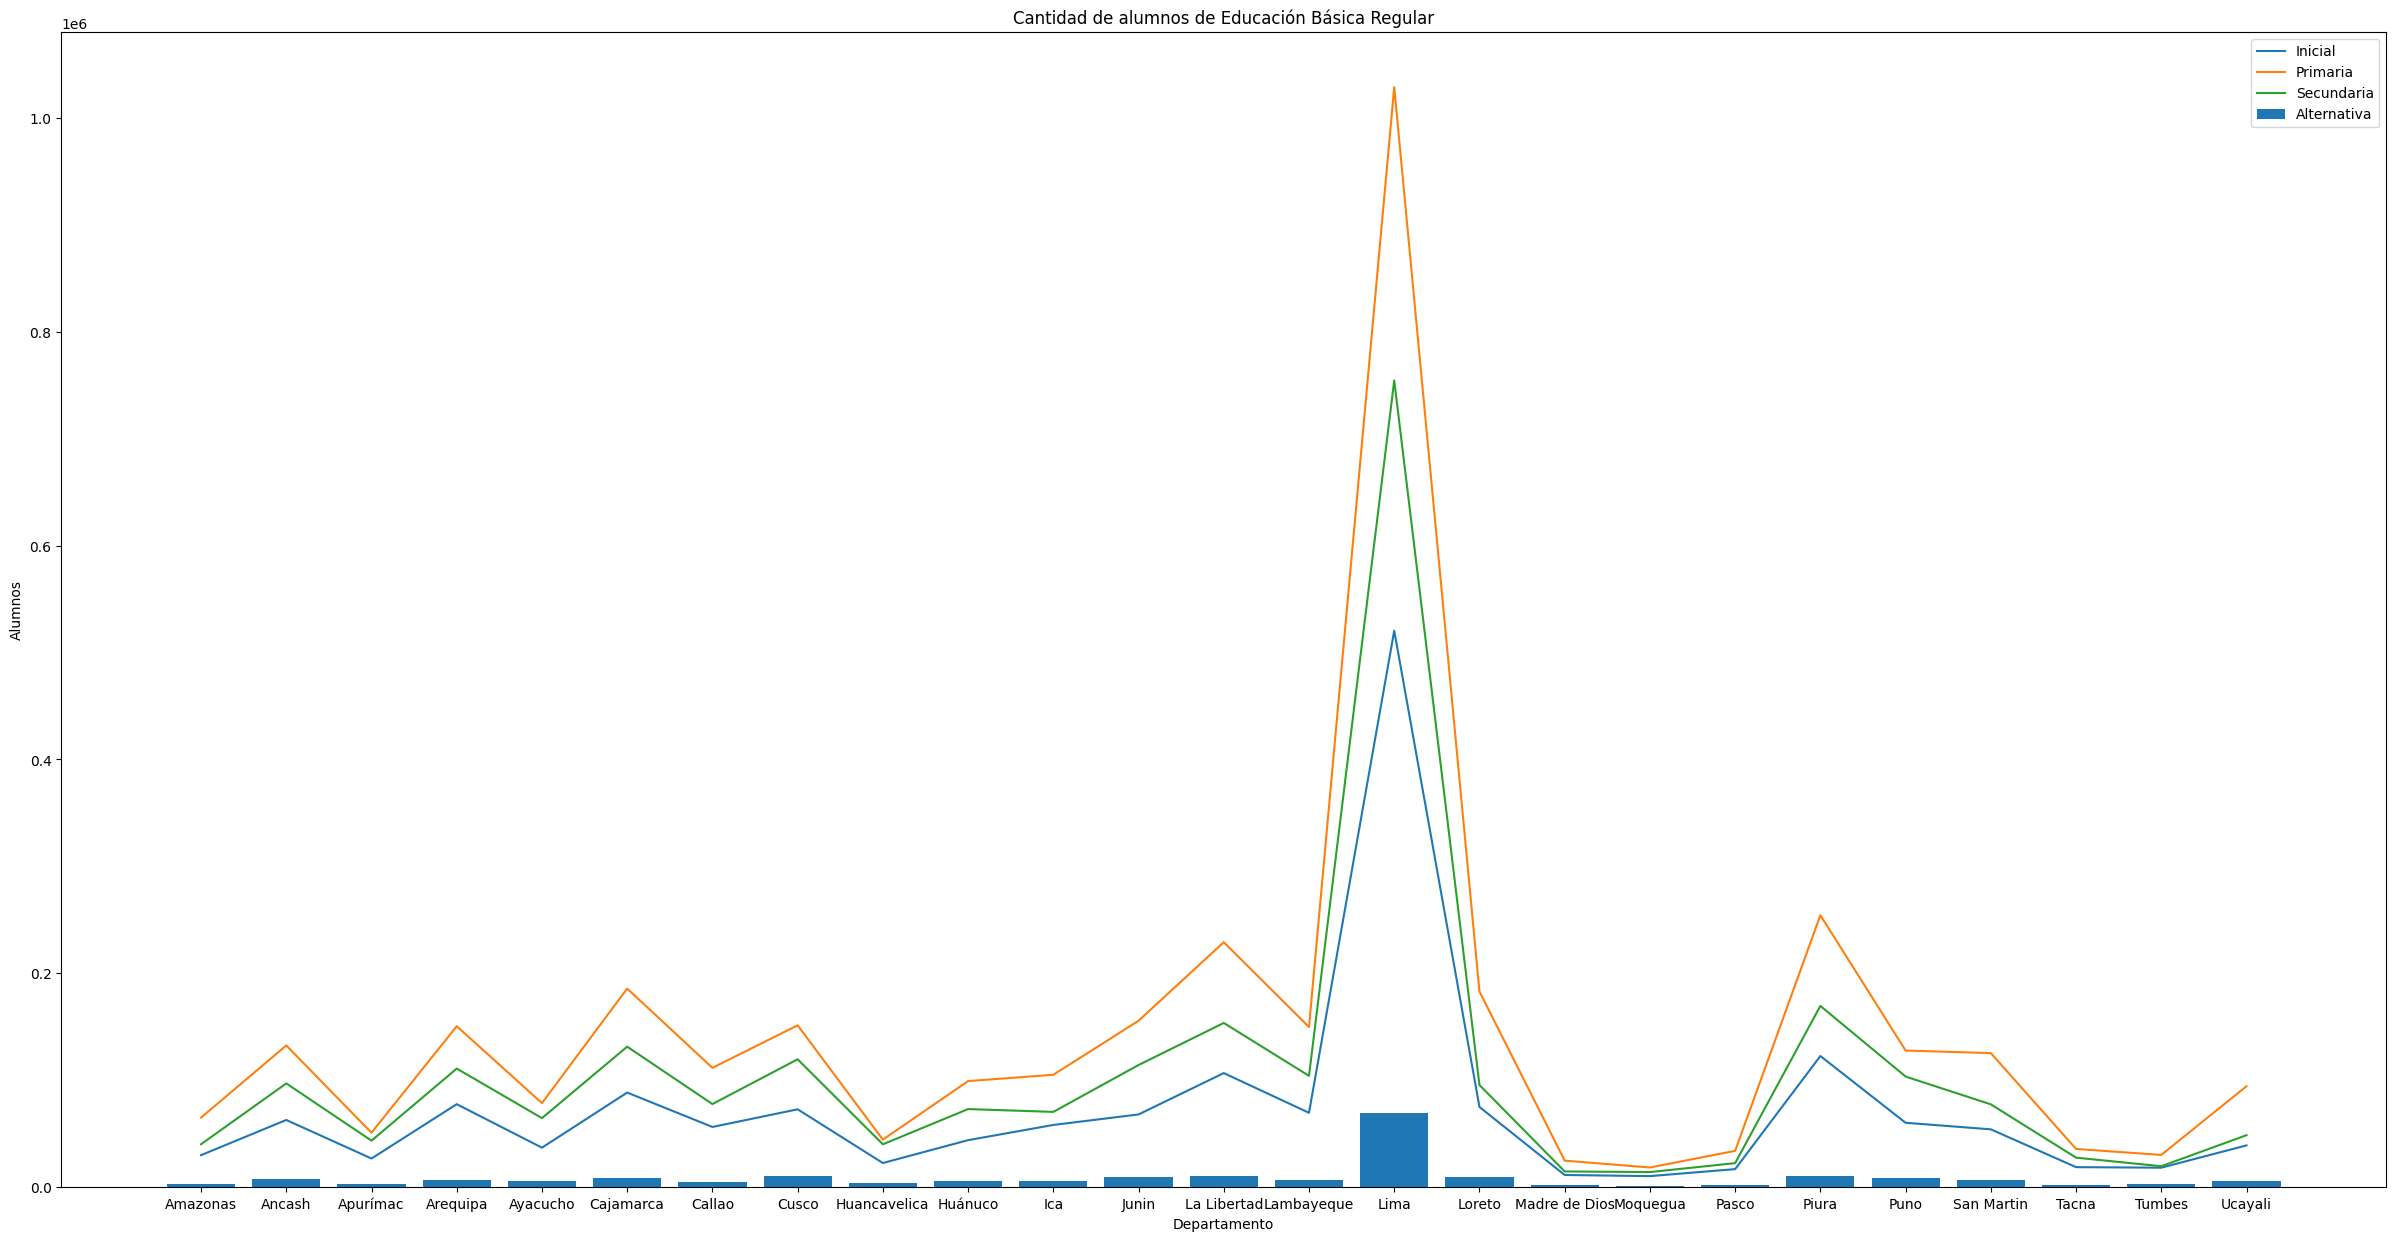

In [123]:
plt.figure(figsize=(30,15))
plt.plot(datos_matricula["Inicial Básica Regular"], label = "Inicial")
plt.plot(datos_matricula["Primaria Básica Regular"], label = "Primaria")
plt.plot(datos_matricula["Secundaria Básica Regular"], label = "Secundaria")
plt.bar(datos_matricula.index, datos_matricula["Básica Alternativa"], label = "Alternativa")
plt.xlabel("Departamento")
plt.ylabel("Alumnos")
plt.legend()
plt.title("Cantidad de alumnos de Educación Básica Regular")
plt.show()

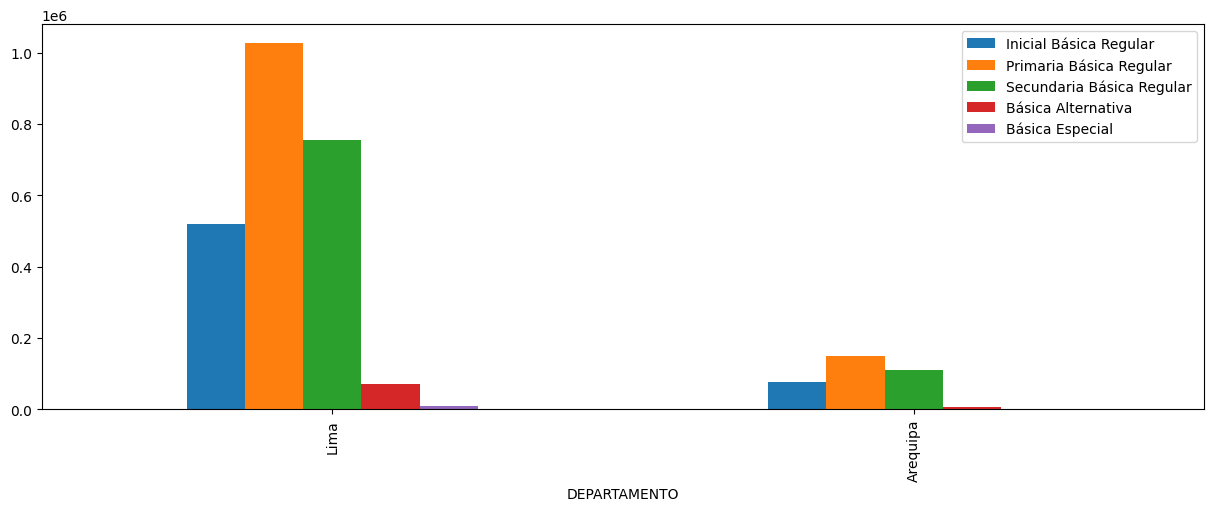

In [130]:
datos_matricula.loc[["Lima","Arequipa"]].plot.bar(figsize=(15,5))
plt.show()

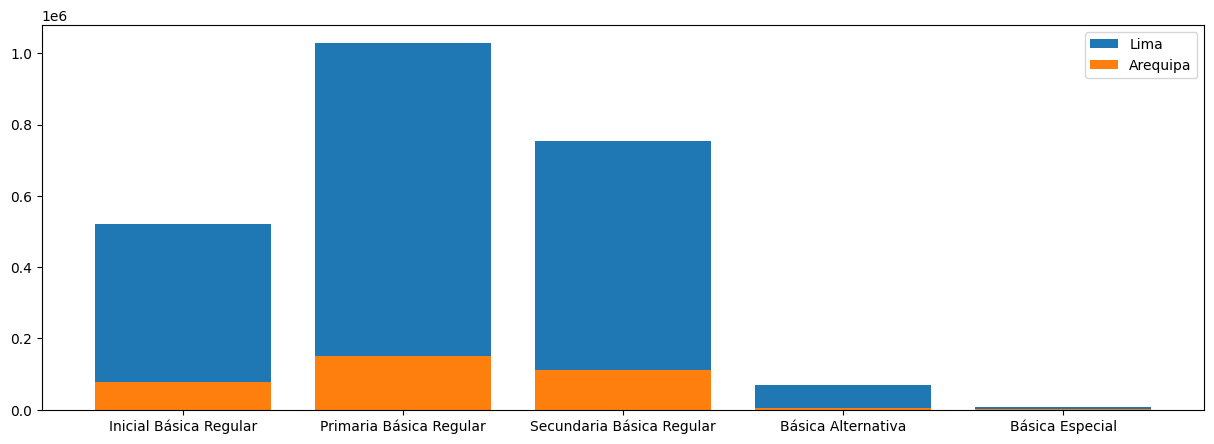

In [154]:
plt.figure(figsize=(15,5))
plt.bar(datos_matricula.columns, datos_matricula.loc["Lima"], label = "Lima")
plt.bar(datos_matricula.columns, datos_matricula.loc["Arequipa"], label = "Arequipa")
plt.legend()
plt.show()